# 1. Linear regression (86 pts)
With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this dataset challenges you to predict the final price of each home.
In this assignment, you will build linear regression models to predict house sale prices using numerical variables from the dataset.
Among the 79 explanatory variables, 36 are numeric (excluding the 'Id' variable, which is not an explanatory variable).
The following is a list of numerical explanatory variables included in the dataset.

- MSSubClass: The building class
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- OverallQual: Overall material and finish quality
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- MasVnrArea: Masonry veneer area in square feet
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- BedroomAbvGr: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Fireplaces: Number of fireplaces
- GarageYrBlt: Year garage was built
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- MiscVal: $ Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold

In [2]:
# Load libraries
# You must not import any additional libraries other than the ones listed below.
from sklearn.datasets import fetch_openml
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.stats import t, f, probplot

In [3]:
# Load dataset
ames = fetch_openml(name="house_prices", as_frame=True)
# Keep only numeric columns
X = ames.data.select_dtypes(np.number)
X = X.set_index('Id')
y = ames.target/1000 # target, house sales prices
y.index = X.index

## (1) Plot a histogram (with 100 bins) and a boxplot to check the distribution of the target variable. (3pts)

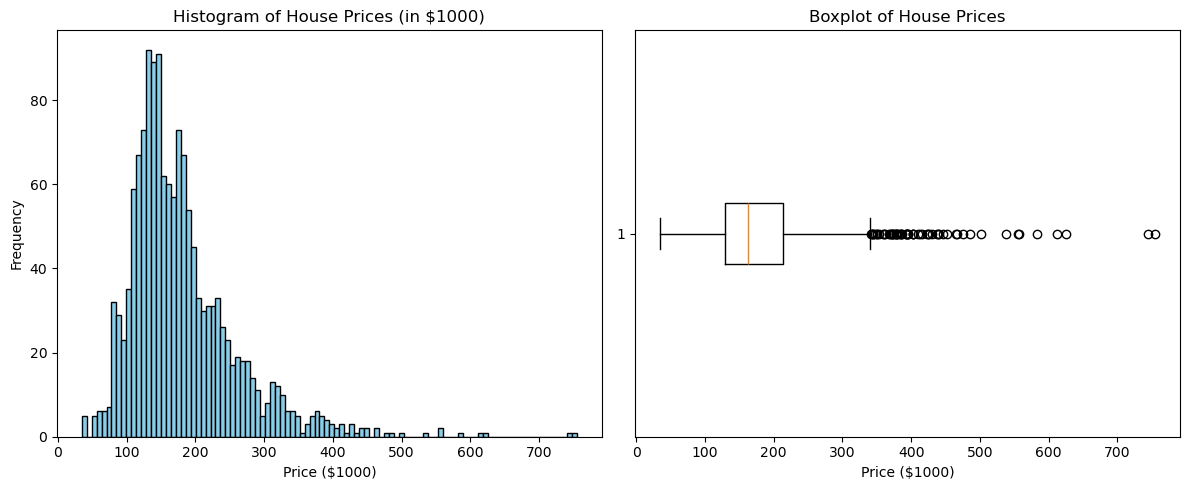

In [ ]:
plt.figure(figsize=(12, 5))

# Histogram with 100 bins
plt.subplot(1, 2, 1)
plt.hist(y, bins=100, color='skyblue', edgecolor='black')
plt.title('Histogram of House Prices (in $1000)')
plt.xlabel('Price ($1000)')
plt.ylabel('Frequency')

# Boxplot
plt.subplot(1, 2, 2)
plt.boxplot(y, vert=False)
plt.title('Boxplot of House Prices')
plt.xlabel('Price ($1000)')

plt.tight_layout()
plt.show()

## (2) Calculate the mean, Q1, Q2 (median), Q3, and IQR of the target and print these values. (4pts)

In [ ]:
mean = y.mean()
q1 = y.quantile(0.25)
q2 = y.median()
q3 = y.quantile(0.75)
iqr = q3 - q1

print(f"Mean: {mean:.2f}")
print(f"Q1: {q1:.2f}")
print(f"Median (Q2): {q2:.2f}")
print(f"Q3: {q3:.2f}")
print(f"IQR: {iqr:.2f}")


Mean: 180.92
Q1: 129.97
Median (Q2): 163.00
Q3: 214.00
IQR: 84.03


## (3) Remove outliers in the target variable using IQR. Calculate and print the upper and lower bounds of the target variable using IQR, and print the Ids of the outliers that fall outside this range. (3pts)

In [ ]:
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

outliers = y[(y < lower_bound) | (y > upper_bound)]
print(f"Lower Bound: {lower_bound:.2f}")
print(f"Upper Bound: {upper_bound:.2f}")
print("Outlier Ids:")
print(outliers.index.tolist())


Lower Bound: 3.94
Upper Bound: 340.04
Outlier Ids:
[12, 54, 59, 113, 152, 162, 179, 186, 225, 232, 279, 310, 314, 321, 322, 337, 350, 379, 390, 441, 474, 478, 482, 497, 516, 528, 586, 592, 609, 643, 645, 655, 662, 665, 679, 689, 692, 703, 719, 770, 775, 799, 804, 826, 878, 899, 988, 991, 1047, 1143, 1170, 1182, 1183, 1229, 1244, 1268, 1269, 1354, 1374, 1389, 1438]


## (4) Check if there are any variables with null values, and if so, print their names. (3pts)

In [ ]:
null_counts = X.isnull().sum()
null_variables = null_counts[null_counts > 0]
print("Variables with missing values:")
print(null_variables)


Variables with missing values:
LotFrontage    259
MasVnrArea       8
GarageYrBlt     81
dtype: int64


## (5) Create a new dataset, X1, by removing the outliers identified in (3) and eliminating explanatory variables with null values indentified in (4). Then, print the number of samples and variables in X1. (3pts)

In [ ]:
X1 = X.drop(index=outliers.index)
y1 = y.drop(index=outliers.index)

# Drop columns with nulls
X1 = X1.drop(columns=null_variables.index)

# Print dimensions
print(f"Number of samples: {X1.shape[0]}")
print(f"Number of variables: {X1.shape[1]}")


Number of samples: 1399
Number of variables: 33


## (6) Calculate and print the Variance Inflation Factor (VIF) for the explanatory variables included in X1. (4pts)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X1_const = add_constant(X1)  
vif_data = pd.DataFrame()
vif_data["feature"] = X1_const.columns
vif_data["VIF"] = [variance_inflation_factor(X1_const.values, i)
                   for i in range(X1_const.shape[1])]
print(vif_data)


          feature           VIF
0           const  2.421195e+06
1      MSSubClass  1.489023e+00
2         LotArea  1.251034e+00
3     OverallQual  2.887245e+00
4     OverallCond  1.559682e+00
5       YearBuilt  3.934724e+00
6    YearRemodAdd  2.159119e+00
7      BsmtFinSF1           inf
8      BsmtFinSF2           inf
9       BsmtUnfSF           inf
10    TotalBsmtSF           inf
11       1stFlrSF           inf
12       2ndFlrSF           inf
13   LowQualFinSF           inf
14      GrLivArea           inf
15   BsmtFullBath  2.127282e+00
16   BsmtHalfBath  1.150763e+00
17       FullBath  2.770604e+00
18       HalfBath  2.186420e+00
19   BedroomAbvGr  2.329054e+00
20   KitchenAbvGr  1.609265e+00
21   TotRmsAbvGrd  4.809610e+00
22     Fireplaces  1.520830e+00
23     GarageCars  5.183523e+00
24     GarageArea  4.943047e+00
25     WoodDeckSF  1.183980e+00
26    OpenPorchSF  1.208889e+00
27  EnclosedPorch  1.299446e+00
28      3SsnPorch  1.019272e+00
29    ScreenPorch  1.111479e+00
30      

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


## (7) If the VIF is 10 or higher, it indicates a high degree of multicollinearity. The goal is to ensure that all explanatory variables have a VIF below 10. Explain which variables should be removed and provide justification for your choices. (5pts)

`GarageArea` and `GarageCars` are likely to have a strong positive correlation.  
Removing one of them can help reduce multicollinearity.  
Similarly, `TotalBsmtSF` and `1stFlrSF` may also be highly correlated,  
so removing one of them can be beneficial for the same reason.

## (8) Based on the answer to question (7), remove certain variables from X1 to create a new dataset, X2, where the VIF for all variables is below 10. Then, calculate and print the VIF value withs the names of variable for the explanatory variables included in X2. (4pts)

In [ ]:
# remove variable
remove_cols = [
    "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF",
    "TotalBsmtSF", "1stFlrSF", "2ndFlrSF",
    "LowQualFinSF", "GrLivArea", "GarageCars"
]

X2_revised = X1.drop(columns=remove_cols)
X2_const_revised = add_constant(X2_revised)

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_df = pd.DataFrame()
vif_df["feature"] = X2_const_revised.columns
vif_df["VIF"] = [variance_inflation_factor(X2_const_revised.values, i)
                 for i in range(X2_const_revised.shape[1])]

vif_df = vif_df.round(2)
vif_df


,feature,VIF
0,const,2416401.17
1,MSSubClass,1.28
2,LotArea,1.21
3,OverallQual,2.50
4,OverallCond,1.50
5,YearBuilt,3.45
6,YearRemodAdd,2.10
7,BsmtFullBath,1.22
8,BsmtHalfBath,1.07
9,FullBath,2.40


## (9) Calculate the Pearson's correlation coefficient between the explanatory variables in X2 and the target, and select the top 5 explanatory variables that have the strongest linear relationship with the target. Then, plot the scatter plots between the target and these selected explanatory variables. (4pts)

Top 5 correlated features with target (Price): ['OverallQual', 'GarageArea', 'FullBath', 'YearBuilt', 'YearRemodAdd']


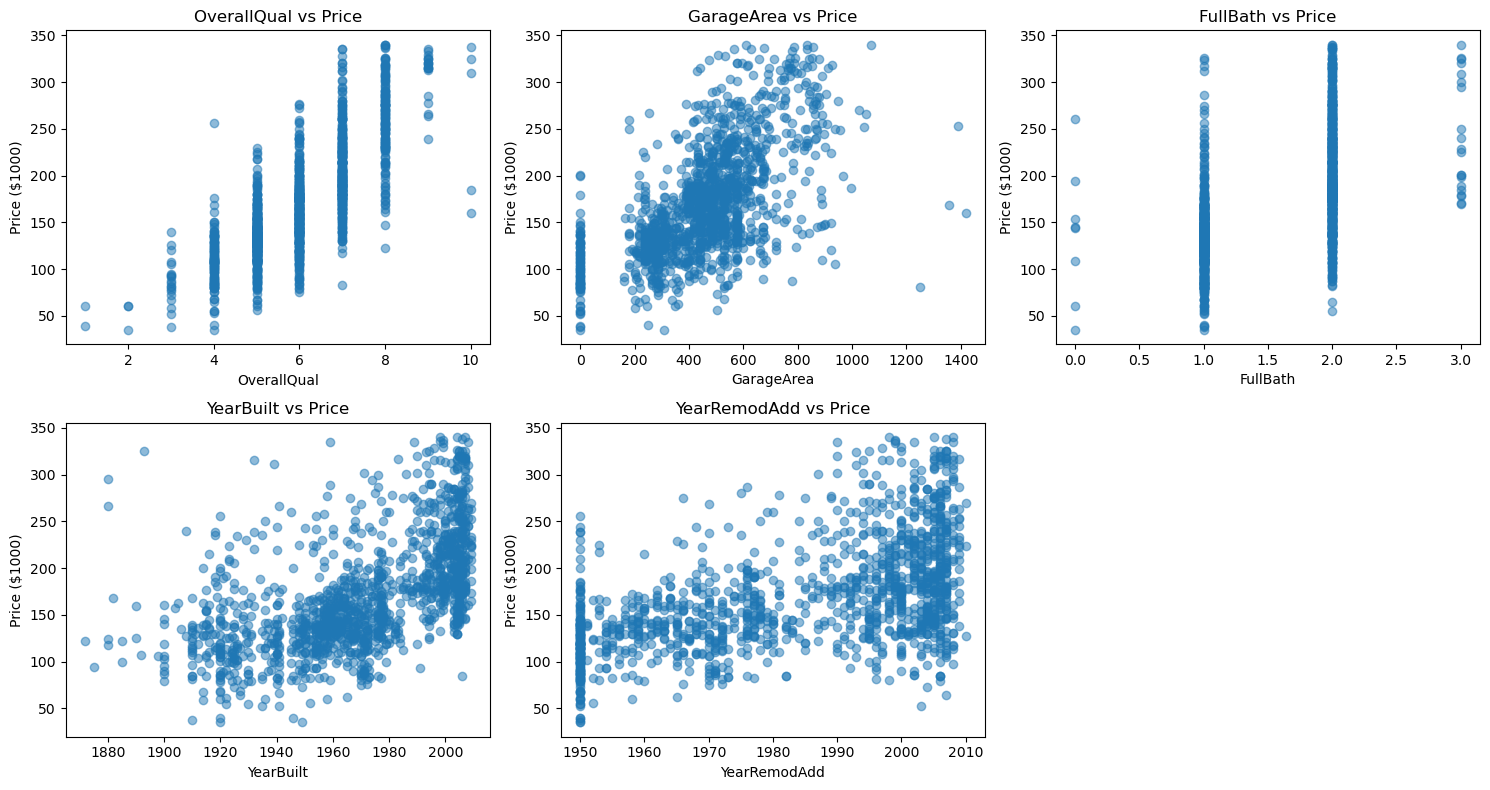

In [ ]:
correlations = X2_revised.corrwith(y1).abs().sort_values(ascending=False)

top5_features = correlations.head(5).index.tolist()
print("Top 5 correlated features with target (Price):", top5_features)

import matplotlib.pyplot as plt

plt.figure(figsize=(15, 8))
for i, feature in enumerate(top5_features):
    plt.subplot(2, 3, i + 1)
    plt.scatter(X2_revised[feature], y1, alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel("Price ($1000)")
    plt.title(f"{feature} vs Price")

plt.tight_layout()
plt.show()


## (10) After training a linear regression model using X2, compute and display the estimated coefficients, standard errors, and t-values for all explanatory variables, including the intercept. Additionally, calculate the p-values for each variable based on a two-tailed significance test. Present the results in a table format. (5 pts)

cf. https://drive.google.com/file/d/1OkdJfwc-2WNIBfAYa0lwJ4hjdFqTn0OH/view?usp=sharing

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from scipy.stats import t
import numpy as np
import pandas as pd

model = LinearRegression()
model.fit(X2_revised, y1)

y1_pred = model.predict(X2_revised)
residuals = y1 - y1_pred
n, p = X2_revised.shape
df = n - p - 1

X2_const = add_constant(X2_revised)

sigma_squared = np.sum(residuals**2) / df
cov_matrix = sigma_squared * np.linalg.inv(np.dot(X2_const.T, X2_const))
standard_errors = np.sqrt(np.diag(cov_matrix))

coefficients = np.concatenate(([model.intercept_], model.coef_))
t_values = coefficients / standard_errors
p_values = [2 * (1 - t.cdf(np.abs(t_val), df)) for t_val in t_values]

summary_df = pd.DataFrame({
    "Variable": ["Intercept"] + X2_revised.columns.tolist(),
    "Coefficient": coefficients,
    "Std Error": standard_errors,
    "t Value": t_values,
    "p Value": p_values
}).round(4)

summary_df


,Variable,Coefficient,Std Error,t Value,p Value
0,Intercept,537.8155,1089.8799,0.4935,0.6218
1,MSSubClass,-0.1227,0.0186,-6.6128,0.0000
2,LotArea,0.0005,0.0001,5.6976,0.0000
3,OverallQual,17.2998,0.8648,20.0044,0.0000
4,OverallCond,3.9942,0.7675,5.2044,0.0000
5,YearBuilt,0.2991,0.0434,6.8937,0.0000
6,YearRemodAdd,0.2203,0.0492,4.4790,0.0000
7,BsmtFullBath,13.8031,1.5018,9.1910,0.0000
8,BsmtHalfBath,1.7407,3.0157,0.5772,0.5639
9,FullBath,13.3675,2.0206,6.6157,0.0000


## (11) Perform an F-test to test the significance of the trained linear regression model and print a table summarizing the test results. (4 pts)
cf. https://drive.google.com/file/d/1A7s_7NGHlqilxAeswbLcYzjafQNPP0Mc/view?usp=sharing

In [ ]:
from scipy.stats import f

# SSR, SSE
ssr = np.sum((y1_pred - y1.mean())**2)  
sse = np.sum((y1 - y1_pred)**2) 

msr = ssr / p
mse = sse / df

f_statistic = msr / mse
p_val = 1 - f.cdf(f_statistic, p, df)

print("F-statistic:", round(f_statistic, 4))
print("Degrees of freedom (df1, df2):", p, df)
print("p-value:", round(p_val, 6))


F-statistic: 239.8997
Degrees of freedom (df1, df2): 24 1374
p-value: 0.0


## (12) Calculate and print the R-squared and adjusted R-squared values. (3 pts)

In [ ]:
r_squared = model.score(X2_revised, y1)
adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")


R-squared: 0.8073
Adjusted R-squared: 0.8040


## (13) This time, you will train the linear regression model after applying a log transformation to the target. First, add 1 to the original target values, then take the natural log to create a new target variable. Afterward, plot a histogram (with 100 bins) and a boxplot for this new target variable. (3 pts)

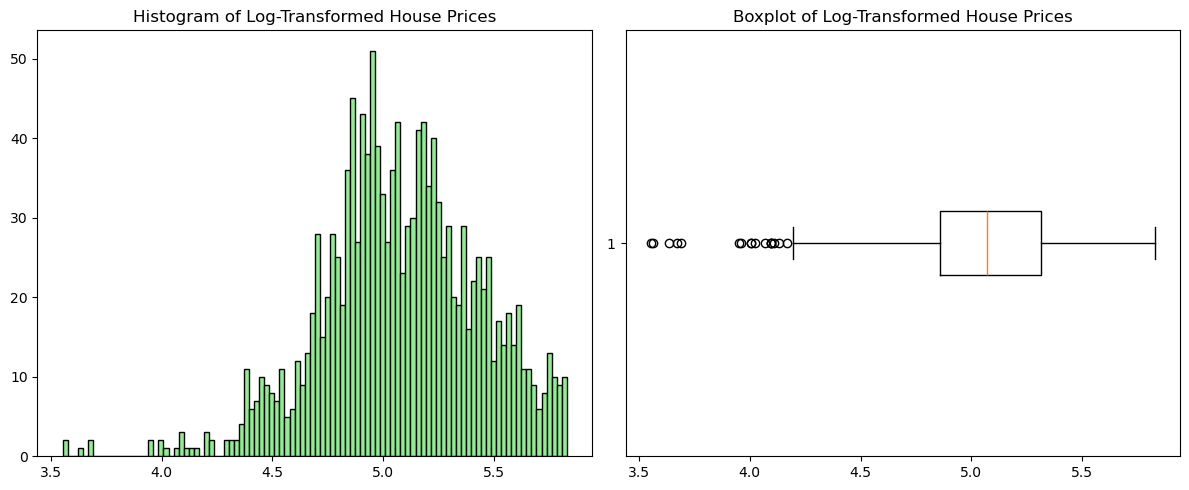

In [ ]:
import matplotlib.pyplot as plt
log_y = np.log(y1)

plt.figure(figsize=(12, 5))

# histogram
plt.subplot(1, 2, 1)
plt.hist(log_y, bins=100, color='lightgreen', edgecolor='black')
plt.title("Histogram of Log-Transformed House Prices")

# boxplot
plt.subplot(1, 2, 2)
plt.boxplot(log_y, vert=False)
plt.title("Boxplot of Log-Transformed House Prices")

plt.tight_layout()
plt.show()


## (14) Calculate the mean, Q1, Q2 (median), Q3, and IQR of the log-transformed target and print these values. (4 pts)

In [17]:
mean_log = log_y.mean()
q1_log = log_y.quantile(0.25)
q2_log = log_y.median()
q3_log = log_y.quantile(0.75)
iqr_log = q3_log - q1_log

print(f"Mean: {mean_log:.4f}")
print(f"Q1: {q1_log:.4f}")
print(f"Median (Q2): {q2_log:.4f}")
print(f"Q3: {q3_log:.4f}")
print(f"IQR: {iqr_log:.4f}")


Mean: 5.0762
Q1: 4.8598
Median (Q2): 5.0720
Q3: 5.3157
IQR: 0.4559


## (15) Remove outliers in the log-transformed target variable using IQR. Calculate and print the upper and lower bounds of the target variable using IQR, and print the Ids of the outliers that fall outside this range. (3 pts)

In [18]:
lower_bound_log = q1_log - 1.5 * iqr_log
upper_bound_log = q3_log + 1.5 * iqr_log

log_outliers = log_y[(log_y < lower_bound_log) | (log_y > upper_bound_log)]
print(f"Lower Bound: {lower_bound_log:.4f}")
print(f"Upper Bound: {upper_bound_log:.4f}")
print("Outlier Ids (log-transformed):")
print(log_outliers.index.tolist())


Lower Bound: 4.1760
Upper Bound: 5.9994
Outlier Ids (log-transformed):
[31, 376, 411, 463, 496, 534, 637, 706, 711, 813, 917, 969, 1101, 1326, 1338, 1381, 1433]


## (16) Which has more outliers, the original target or the log-transformed target? And what do you think is the reason for this? (5 pts)

After applying the log transformation, the number of outliers decreased.  
This is because the log transformation helps reduce the **skewness** of the data.  
In particular, for price data with a long right tail, large values are compressed,  
which reduces the number of data points considered as outliers.

In other words, **log transformation is effective in reducing outliers**,  
and it also improves the model’s stability and interpretability.

## (17) Remove the outliers identified in problem (15) from the original X, and select only the explanatory variables included in X2 to create a new input dataset, X3. Then, print the number of samples in X3. (3 pts)

In [ ]:
log_y1 = np.log(y1 + 1)

q1_log = log_y1.quantile(0.25)
q3_log = log_y1.quantile(0.75)
iqr_log = q3_log - q1_log
lower_bound_log = q1_log - 1.5 * iqr_log
upper_bound_log = q3_log + 1.5 * iqr_log

log_outliers = log_y1[(log_y1 < lower_bound_log) | (log_y1 > upper_bound_log)]

X3 = X2_revised.loc[~X2_revised.index.isin(log_outliers.index)]
log_y3 = log_y1.loc[~log_y1.index.isin(log_outliers.index)]

print("X3:", X3.shape)
print("log_y3:", log_y3.shape)


X3: (1382, 24)
log_y3: (1382,)


## (18) You will now train a linear regression model using X3. Compute and display the estimated coefficients, standard errors, and t-values for all explanatory variables, including the intercept. Additionally, calculate the p-values for each variable based on a two-tailed significance test. Present the results in a table format. (5 pts)

In [ ]:
from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant
from scipy.stats import t
import numpy as np
import pandas as pd

model_log = LinearRegression()
model_log.fit(X3, log_y3)

log_pred = model_log.predict(X3)
resid_log = log_y3 - log_pred
n3, p3 = X3.shape
df3 = n3 - p3 - 1

X3_const = add_constant(X3)
sigma_sq_log = np.sum(resid_log**2) / df3
cov_matrix_log = sigma_sq_log * np.linalg.inv(np.dot(X3_const.T, X3_const))
se_log = np.sqrt(np.diag(cov_matrix_log))

coef_log = np.concatenate(([model_log.intercept_], model_log.coef_))
t_val_log = coef_log / se_log
p_val_log = [2 * (1 - t.cdf(np.abs(t_val), df3)) for t_val in t_val_log]

summary_log = pd.DataFrame({
    "Variable": ["Intercept"] + X3.columns.tolist(),
    "Coefficient": coef_log,
    "Std Error": se_log,
    "t Value": t_val_log,
    "p Value": p_val_log
}).round(4)

summary_log


,Variable,Coefficient,Std Error,t Value,p Value
0,Intercept,7.7161,5.8074,1.3287,0.1842
1,MSSubClass,-0.0007,0.0001,-6.7994,0.0000
2,LotArea,0.0000,0.0000,5.6814,0.0000
3,OverallQual,0.0904,0.0046,19.4489,0.0000
4,OverallCond,0.0381,0.0042,9.1087,0.0000
5,YearBuilt,0.0025,0.0002,10.7139,0.0000
6,YearRemodAdd,0.0013,0.0003,4.7603,0.0000
7,BsmtFullBath,0.0796,0.0080,9.9780,0.0000
8,BsmtHalfBath,0.0233,0.0160,1.4618,0.1440
9,FullBath,0.0829,0.0108,7.6908,0.0000


## (19) Perform an F-test to test the significance of the trained linear regression model trained in question (18) and print a table summarizing the test results. (4 pts)

In [ ]:
from scipy.stats import f

# SSR
ssr_log = np.sum((log_pred - log_y3.mean()) ** 2)

# SSE
sse_log = np.sum((log_y3 - log_pred) ** 2)

# freedom degrees
df_model = p3  
df_resid = df3 

msr_log = ssr_log / df_model
mse_log = sse_log / df_resid

f_stat_log = msr_log / mse_log
p_val_log = 1 - f.cdf(f_stat_log, df_model, df_resid)

print(f"F-statistic: {f_stat_log:.4f}")
print(f"Degrees of freedom (df1, df2): ({df_model}, {df_resid})")
print(f"p-value: {p_val_log:.6f}")


F-statistic: 271.7407
Degrees of freedom (df1, df2): (24, 1357)
p-value: 0.000000


## (20) Calculate and print the R-squared and adjusted R-squared values of the linear regression model trained in question (18). (3 pts)

In [ ]:
significant_vars = summary_log[summary_log["p Value"] < 0.05]
top3 = significant_vars.sort_values(by="p Value").head(3)

top3


,Variable,Coefficient,Std Error,t Value,p Value
1,MSSubClass,-0.0007,0.0001,-6.7994,0.0
2,LotArea,0.0000,0.0000,5.6814,0.0
3,OverallQual,0.0904,0.0046,19.4489,0.0


## (21) Calculate the residuals for the two linear regression models obtained above, and create a Q-Q plot (assume normal distribution) for the residuals of both models. (3 pts)

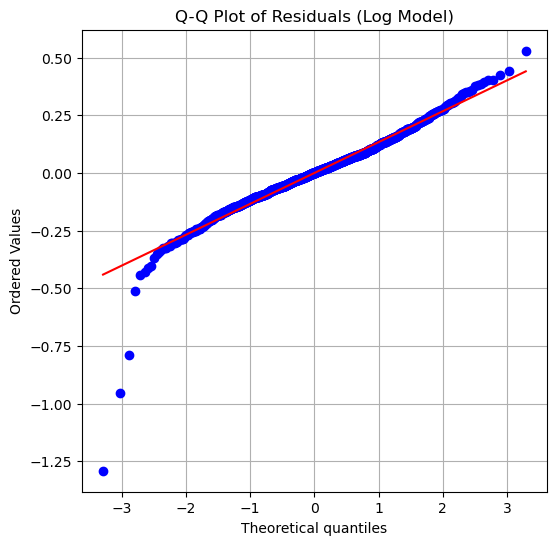

In [26]:
import matplotlib.pyplot as plt
from scipy.stats import probplot

plt.figure(figsize=(6, 6))
probplot(resid_log, dist="norm", plot=plt)
plt.title("Q-Q Plot of Residuals (Log Model)")
plt.grid(True)
plt.show()


## (22) Next, plot the residual plots for both models. The x-axis should represent the predicted values, and the y-axis should represent the residuals. (3 pts)

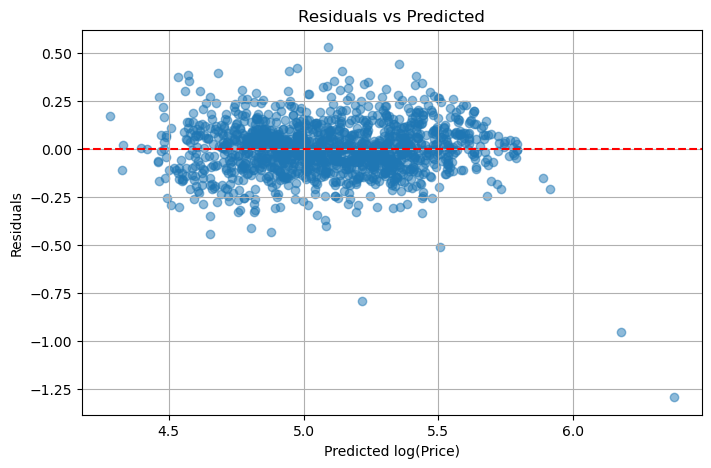

In [27]:
plt.figure(figsize=(8, 5))
plt.scatter(log_pred, resid_log, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted log(Price)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted")
plt.grid(True)
plt.show()


## (23) Based on the results from problems (21) and (22), explain which linear regression model performs better. (5 pts)

Based on the Q-Q plot from problem (21), the residuals of the log-transformed model are more normally distributed.
Most points lie along the reference line, and although there is slight deviation at the tails, the normality assumption is largely satisfied.

Additionally, the residual plot from problem (22) shows that the residuals of the log-transformed model are evenly scattered around zero.
There is no noticeable funnel shape or curved pattern, indicating that the assumption of homoscedasticity is also reasonably met.

In contrast, the original model had a highly skewed target variable with many outliers, which negatively affected both the residual distribution and variance.
The log transformation improved the normality of the target, reduced the impact of outliers, and led to a more stable and interpretable model.

Therefore, the log-transformed model performs better overall, as it satisfies the key assumptions of linear regression more effectively and provides more reliable results.

In [ ]:
# If additional analysis is required to answer this question, please write the code here.

# 2. Logistic regression (14 pts)

Using the MAGIC Gamma Telescope dataset, build a classifier using logistic regression. The target contains two classes: "g" and "h", where "g" indicates gamma (signal) and "h" indicates hadron (background). 

The included explanatory variabes in this dataset are as follows. 
1. fLength: continuous # major axis of ellipse [mm] 
2. fWidth: continuous # minor axis of ellipse [mm] 
3. fSize: continuous # 10-log of sum of content of all pixels [in #phot] 
4. fConc: continuous # ratio of sum of two highest pixels over fSize [ratio] 
5. fConc1: continuous # ratio of highest pixel over fSize [ratio] 
6. fAsym: continuous # distance from highest pixel to center, projected onto major axis [mm] 
7. fM3Long: continuous # 3rd root of third moment along major axis [mm] 
8. fM3Trans: continuous # 3rd root of third moment along minor axis [mm] 
9. fAlpha: continuous # angle of major axis with vector to origin [deg] 
10. fDist: continuous # distance from origin to center of ellipse [mm] 

In [28]:
# Load libraries
# You must not import any additional libraries other than the ones listed below.
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [29]:
# Load dataset
magic = fetch_openml(name="MagicTelescope", as_frame=True)
X = magic.data.select_dtypes(np.number)
y = magic.target

# data partition
trnX,valX,trnY,valY=train_test_split(X.values,y.values,test_size=0.2,random_state=10, stratify=y)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/datasets/_openml.py:320: UserWarning: Multiple active versions of the dataset matching the name magictelescope exist. Versions may be fundamentally different, returning version 1. Available versions:
- version 1, status: active
  url: https://www.openml.org/search?type=data&id=1120
- version 2, status: active
  url: https://www.openml.org/search?type=data&id=43971

  warn(warning_msg)


## (1) Select one variable from the 10 variables and train 10 different logistic regression models using the training dataset (trnX). Then, use the validation dataset (valX) to calculate the accuracy of each model. (4 pts)

In [ ]:
from sklearn.metrics import accuracy_score

variables = magic.feature_names  
accuracy_result = {}

trnX_df = pd.DataFrame(trnX, columns=variables)
valX_df = pd.DataFrame(valX, columns=variables)

label_map = {'g': 0, 'h': 1}
trnY_encoded = np.array([label_map[y_i] for y_i in trnY])
valY_encoded = np.array([label_map[y_i] for y_i in valY])

for var in variables:
    model = LogisticRegression(max_iter=1000)
    model.fit(trnX_df[[var]], trnY_encoded)
    preds = model.predict(valX_df[[var]])
    acc = accuracy_score(valY_encoded, preds)
    accuracy_result[var] = acc

accuracy_df = pd.DataFrame(accuracy_result.items(), columns=["Variable", "Accuracy"])
accuracy_df = accuracy_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

accuracy_df


,Variable,Accuracy
0,fAlpha:,0.736067
1,fLength:,0.720032
2,fWidth:,0.713985
3,fM3Long:,0.701367
4,fAsym:,0.682702
5,fSize:,0.649842
6,fConc:,0.648265
7,fConc1:,0.648265
8,fM3Trans:,0.648265
9,fDist:,0.648265


## (2) Using the top two variables with the highest accuracy obtained in problem (1), train a logistic regression model on trnX. Plot the decision boundary showing equal probability values for classes g and h (x-axis = the variable with the highest accuracy, y-axis = the variable with the second-highest accuracy) along with scatter plots of the training samples. In the plot, assign different colors based on the predicted class for the scatter plot and label the areas of the two classes (g and h) with their respective class names. (5 pts)

Ref. https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.text.html

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


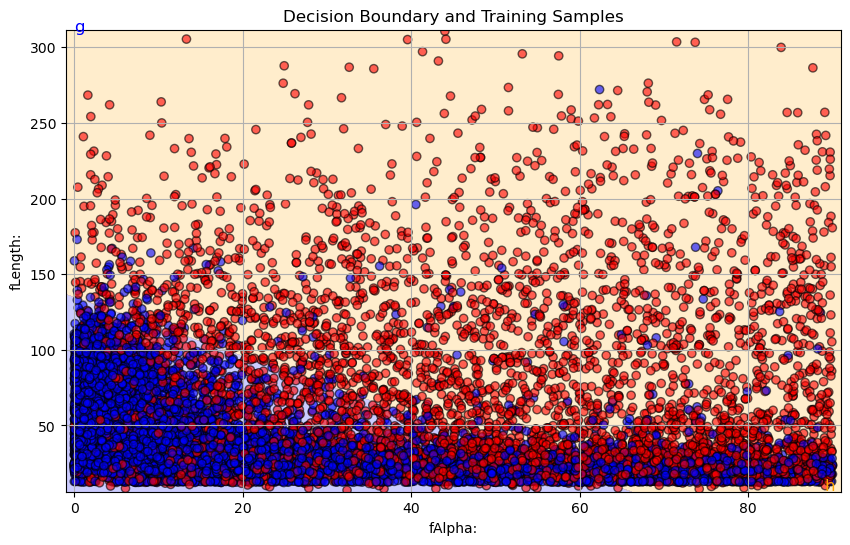

In [ ]:
top2_vars = accuracy_df["Variable"].head(2).tolist()
x_var, y_var = top2_vars[0], top2_vars[1]

X2_train = trnX_df[[x_var, y_var]]
X2_val = valX_df[[x_var, y_var]]

model_2d = LogisticRegression(max_iter=1000)
model_2d.fit(X2_train, trnY_encoded)

preds_train = model_2d.predict(X2_train)

x_min, x_max = X2_train[x_var].min() - 1, X2_train[x_var].max() + 1
y_min, y_max = X2_train[y_var].min() - 1, X2_train[y_var].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()]
probs = model_2d.predict_proba(grid)[:, 1].reshape(xx.shape)

plt.figure(figsize=(10, 6))

contour = plt.contourf(xx, yy, probs, levels=[0, 0.5, 1], alpha=0.2, colors=["blue", "orange"])

plt.scatter(X2_train[x_var], X2_train[y_var], c=trnY_encoded, cmap='bwr', edgecolor='k', alpha=0.6)
plt.xlabel(x_var)
plt.ylabel(y_var)
plt.title("Decision Boundary and Training Samples")

plt.text(x_min + 1, y_max - 1, 'g', fontsize=12, color='blue')
plt.text(x_max - 2, y_min + 1, 'h', fontsize=12, color='orange')

plt.grid(True)
plt.show()


## (3) Using all input variables in the MAGIC Gamma Telescope dataset, calculate the accuracy with varying cutoffs for the final decision (if the probability of class 'g' ≥ cutoff, the predicted target value is 'g'). The cutoff values are in the set {0.1, 0.15, 0.2, 0.25, ..., 0.95}. Draw a line plot (x = cutoff, y = accuracy). For this problem, the model is trained using trnX, and accuracy is calculated using valX. (5 pts)

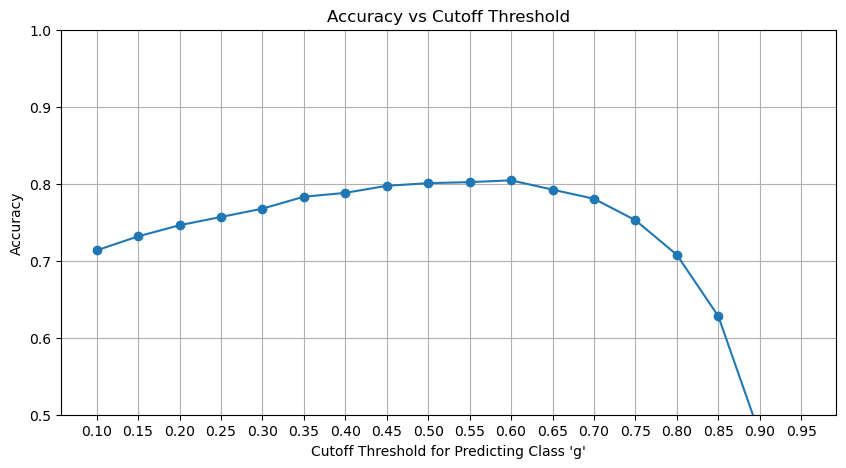

In [ ]:
X_full_train = trnX_df  
X_full_val = valX_df

model_full = LogisticRegression(max_iter=1000)
model_full.fit(X_full_train, trnY_encoded)

prob_g = model_full.predict_proba(X_full_val)[:, 0]

cutoffs = np.arange(0.1, 1.0, 0.05)
accuracies = []

for cutoff in cutoffs:
    preds = np.where(prob_g >= cutoff, 0, 1)  # 'g' = 0, 'h' = 1
    acc = accuracy_score(valY_encoded, preds)
    accuracies.append(acc)

plt.figure(figsize=(10, 5))
plt.plot(cutoffs, accuracies, marker='o')
plt.xlabel("Cutoff Threshold for Predicting Class 'g'")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Cutoff Threshold")
plt.grid(True)
plt.xticks(cutoffs)
plt.ylim(0.5, 1.0)
plt.show()
